 # <p style="padding:10px;background-color:#21130d ;margin:10;color:#FFD700;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:70">Gemstone Price Prediction - Bankole Ayoade</p>

<img src="C:\Users\Tunde\Desktop\Python_Pratctise\Capstone Projects\Gemstone Price Prediction\images\gemstone_image.jpg" alt="Girl in a jacket" style="width:1000px;height:500px;">

 # <p style="padding:10px;background-color:#21130d ;margin:10;color:#FFD700;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Data Ingestion</p>

## Import Basic Dependencies

In [2]:
# Import Basic Dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

# Import Other Required Dependencies
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

## Reading Dataset

In [3]:
# Reading from Training Set
df = pd.read_csv("train.csv")

In [43]:
df.head()

id  carat        cut color clarity  depth  table     x     y     z  price
0   0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1   1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2   2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3   3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4   4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453

In [5]:
# Checking the five records
df.tail()

id  carat        cut color clarity  depth  table     x     y  \
193568  193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39   
193569  193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77   
193570  193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75   
193571  193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49   
193572  193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71   

           z  price  
193568  2.67   1130  
193569  3.47   2874  
193570  3.62   3036  
193571  2.81    681  
193572  3.48   2258

In [6]:
# Info About Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
# Checking the no of column
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

### Insights
###### There are 11 columns, 7 of which are numeric while 4 are categorical.

 # <p style="padding:10px;background-color:#21130d ;margin:10;color:#FFD700;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Shape Of The Dataset</p>

In [8]:
df.shape

(193573, 11)

### Insights
###### There are 193,573 records and 11 columns

 # <p style="padding:10px;background-color:#21130d ;margin:10;color:#FFD700;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Checking For Missing Values</p>

In [9]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [10]:
df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Insights
###### There are missing values in the dataset

 # <p style="padding:10px;background-color:#21130d ;margin:10;color:#FFD700;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Checking For Duplicates</p>

In [11]:
df[df.duplicated()]

Empty DataFrame
Columns: [id, carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

In [12]:
df.duplicated().sum()

0

 # <p style="padding:10px;background-color:#21130d ;margin:10;color:#FFD700;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Numerical Vs Categorical Features</p>

In [13]:
# Uniques values for the categorical features

In [20]:
cat_feature = list(df.columns[df.dtypes =='object'])
num_feature = list(df.columns[df.dtypes!='object'])
print("\n")
print(f"Categorical Features: {cat_feature}")
print("\n")
print("="*70)
print("\n")
print(f"Numerical Features: {num_feature}")



Categorical Features: ['cut', 'color', 'clarity']




Numerical Features: ['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price']


 # <p style="padding:10px;background-color:#21130d ;margin:10;color:#FFD700;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">No Of Unique Values For Categorical  And Numerical Features </p>

In [15]:
# Unique Values For 
for col in cat_feature:
    print(f"The unique values for column {col} are: \n {df[col].unique()} \n No of unique values are {df[col].nunique()} ")
    print("\n")
print("="*60)
    
for num in num_feature:    
    print(f"The unique values for column {num} are: \n {df[num].unique()} \n No of unique values are {df[num].nunique()} ")
    print("\n")

The unique values for column cut are: 
 ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair'] 
 No of unique values are 5 


The unique values for column color are: 
 ['F' 'J' 'G' 'E' 'D' 'H' 'I'] 
 No of unique values are 7 


The unique values for column clarity are: 
 ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1'] 
 No of unique values are 8 


The unique values for column id are: 
 [     0      1      2 ... 193570 193571 193572] 
 No of unique values are 193573 


The unique values for column carat are: 
 [1.52 2.03 0.7  0.32 1.7  1.51 0.74 1.34 0.3  1.01 0.23 0.31 0.33 1.06
 0.26 0.73 0.39 0.25 0.4  0.71 0.5  1.11 0.37 0.38 0.9  0.35 0.41 0.57
 1.5  1.   0.42 1.04 0.43 1.2  0.77 0.52 0.85 1.44 1.22 0.75 1.29 1.02
 2.02 1.54 2.01 1.48 0.59 0.27 1.61 1.53 1.25 1.07 2.   0.86 0.55 0.97
 0.72 1.21 1.05 0.91 2.22 1.27 1.33 1.08 0.28 0.56 0.58 1.28 1.36 1.13
 2.1  0.34 0.82 2.32 2.24 1.67 1.16 1.31 2.18 0.76 1.19 1.56 1.74 2.43
 1.09 0.51 0.95 2.2  0.36 0.68 1.1  1.3  2.25 2.04 0.29 0.94 1.4

### Insights
######  The 3 categorical features and each  have a no of unique values. These values are ordinal in nature and require appropriate ranking to reflect their importance. This will be done in the feature engineering section.

 # <p style="padding:10px;background-color:#21130d ;margin:10;color:#FFD700;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Dataset Statistics Summary</p>

In [16]:
# Sstatistics For Numeric Features
df[num_feature].describe().T

count          mean           std    min       25%       50%  \
id     193573.0  96786.000000  55879.856166    0.0  48393.00  96786.00   
carat  193573.0      0.790688      0.462688    0.2      0.40      0.70   
depth  193573.0     61.820574      1.081704   52.1     61.30     61.90   
table  193573.0     57.227675      1.918844   49.0     56.00     57.00   
x      193573.0      5.715312      1.109422    0.0      4.70      5.70   
y      193573.0      5.720094      1.102333    0.0      4.71      5.72   
z      193573.0      3.534246      0.688922    0.0      2.90      3.53   
price  193573.0   3969.155414   4034.374138  326.0    951.00   2401.00   

             75%        max  
id     145179.00  193572.00  
carat       1.03       3.50  
depth      62.40      71.60  
table      58.00      79.00  
x           6.51       9.65  
y           6.51      10.01  
z           4.03      31.30  
price    5408.00   18818.00

In [17]:
# Sstatistics For Categorical Features
df[cat_feature].describe().T

count unique    top   freq
cut      193573      5  Ideal  92454
color    193573      7      G  44391
clarity  193573      8    SI1  53272

 # <p style="padding:10px;background-color:#21130d ;margin:10;color:#FFD700;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Univariate Analysis</p>

In [8]:
Numerical_Features= ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

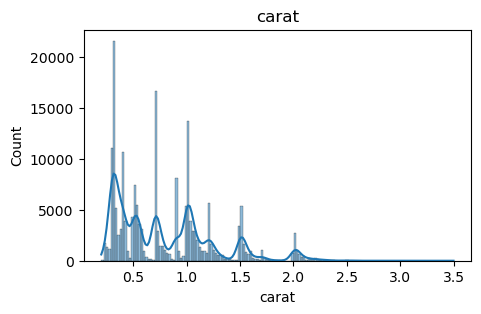

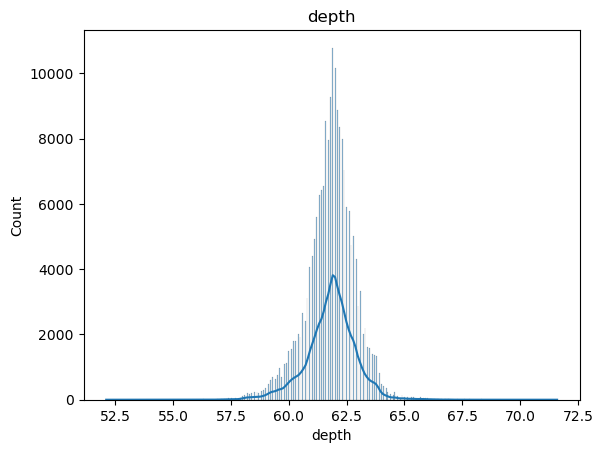

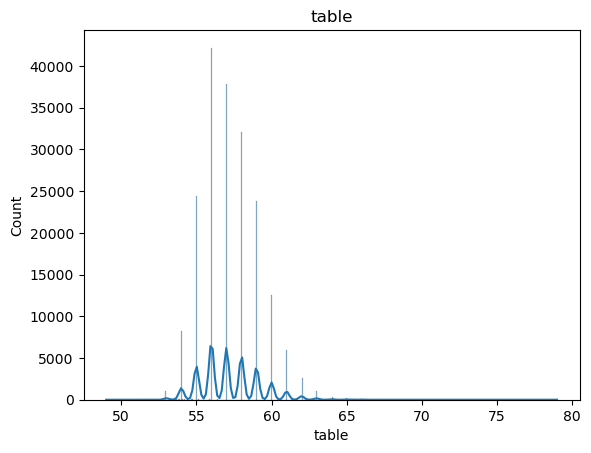

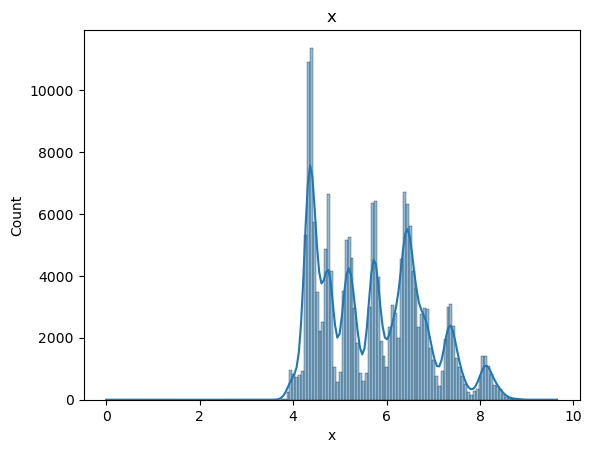

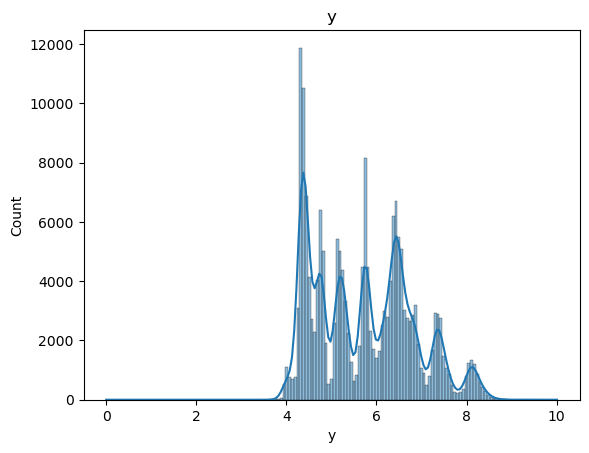

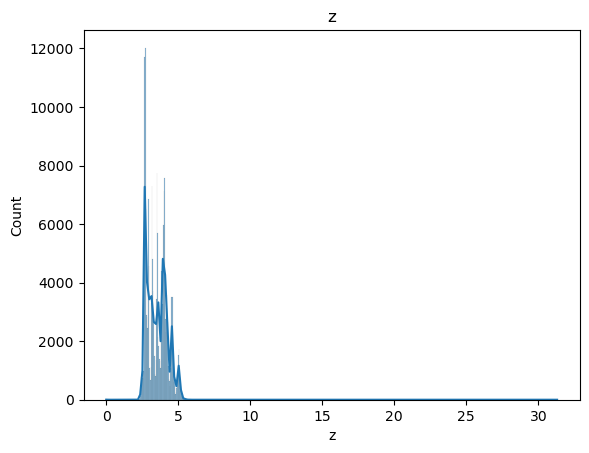

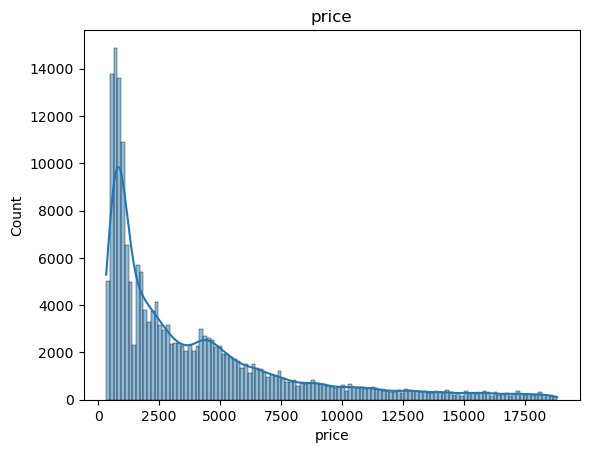

In [13]:
plt.figure(figsize=(5,3))
# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in Numerical_Features:
    sns.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

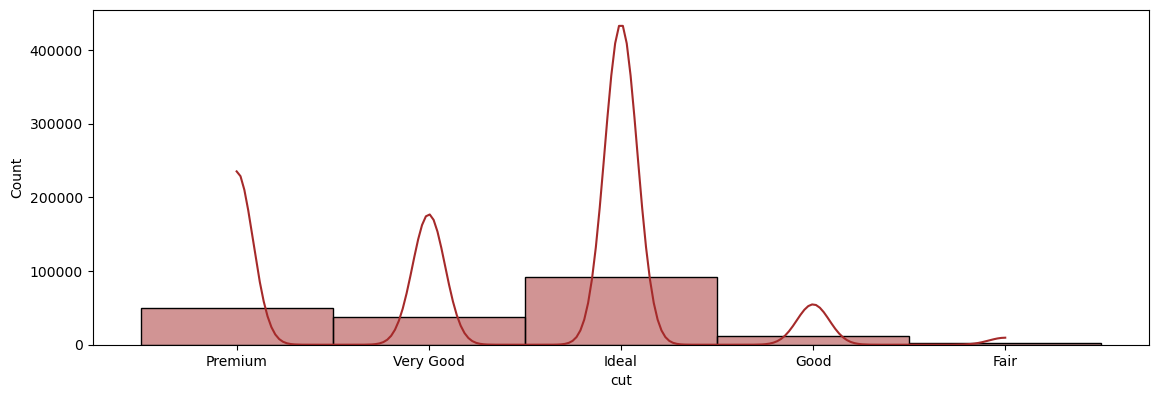

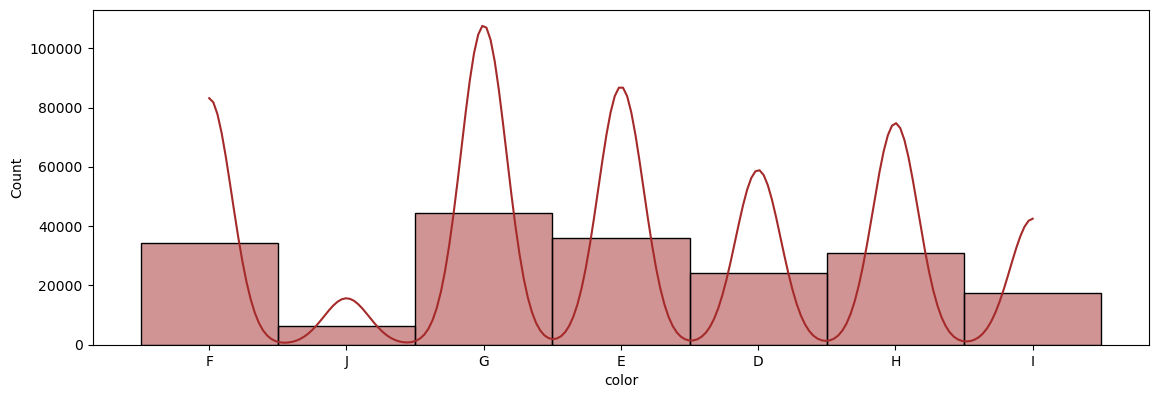

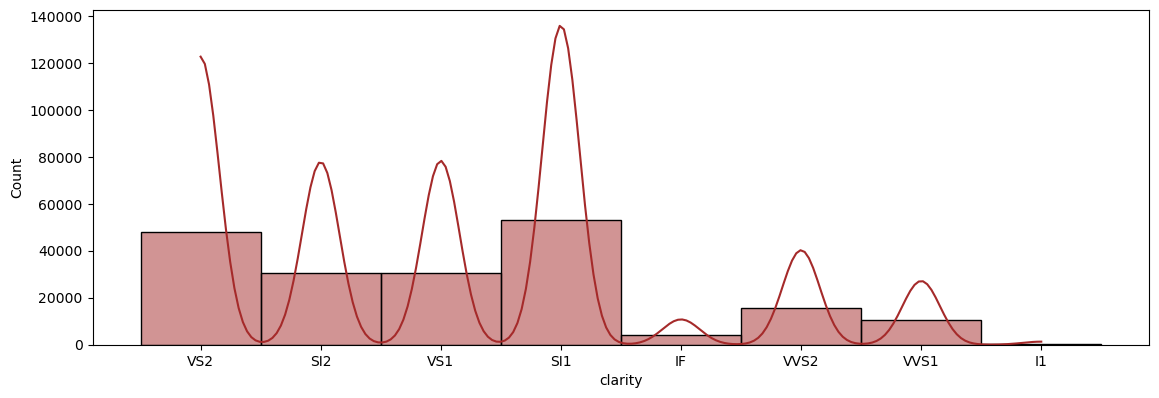

In [20]:
for j in cat_feature:
    plt.figure(figsize =(30, 20))
    plt.subplot(4,2,1)
    sns.histplot(data=df,x= j,bins=30,kde=True,color='brown')
    
    plt.show()

### Insights
######  Cut feature, ideal and premiun categories dominate by more than 50% of whole column count  while fair category has the least value count.
######  Color feature, category F, G, E,D,H dominate the count while j and i have least count value of less than 10%.
######  Clarity feature, the first 4 categories (VS2, SI2, VS1,SI1) are the dominant categories absorping more than 90% while F, VVS2, VVS1 and I1 have the least count values of less than 10%. 


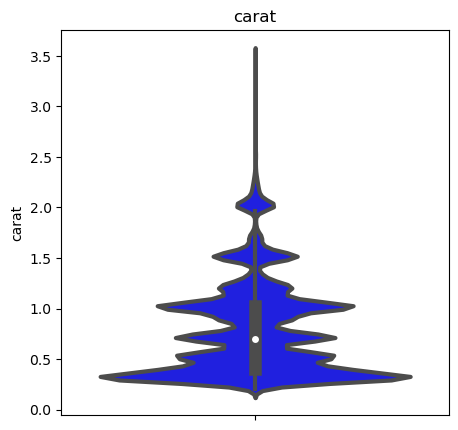

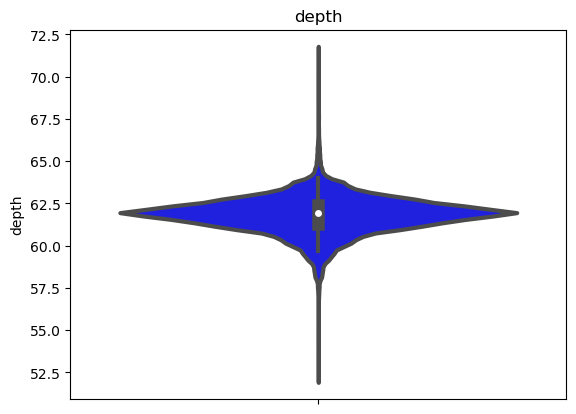

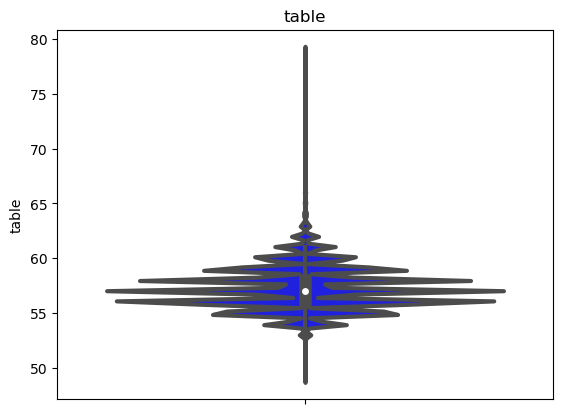

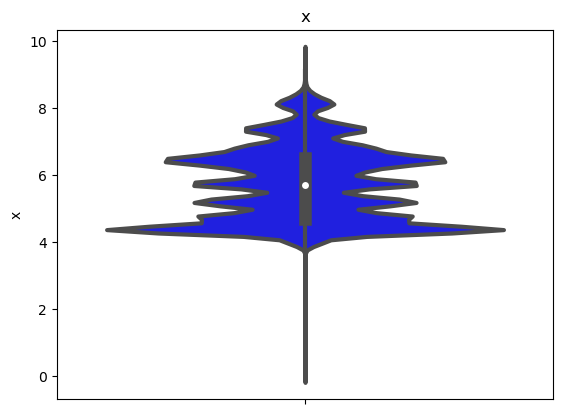

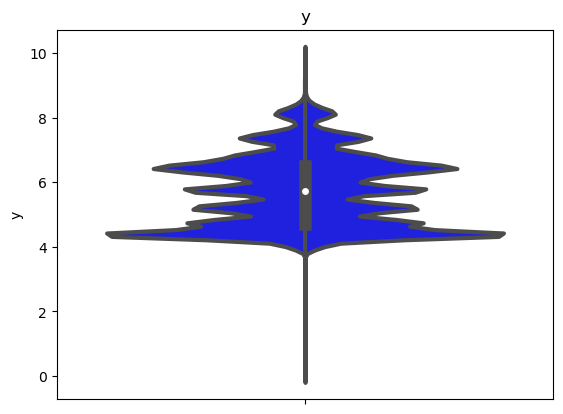

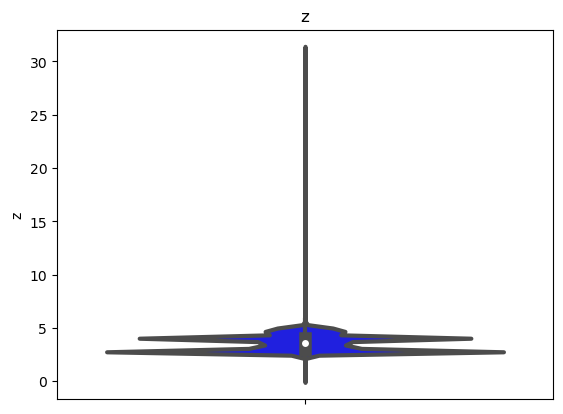

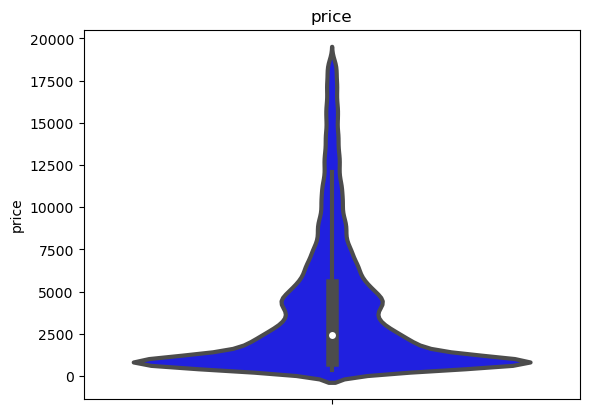

In [15]:
plt.figure(figsize=(5,5))
# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in Numerical_Features:
    sns.violinplot(y=i ,data=df,color='blue',linewidth=3)
    plt.title(i)
    print('\n')
    plt.show()

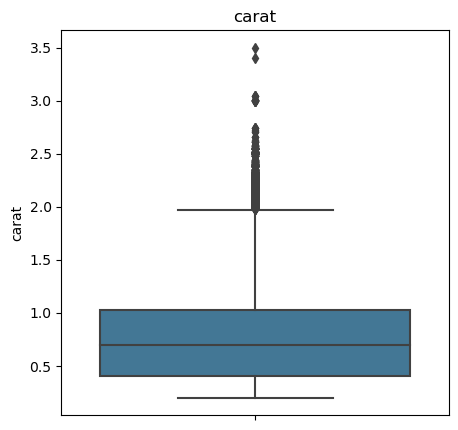

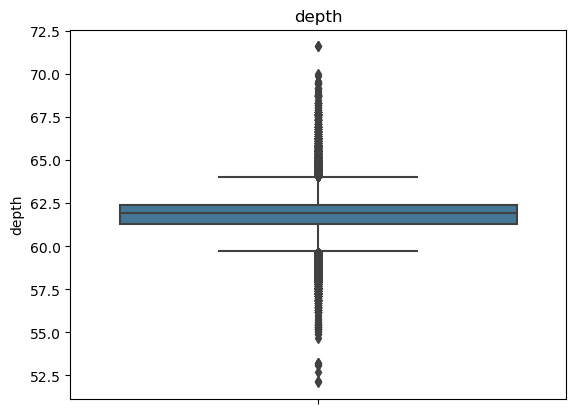

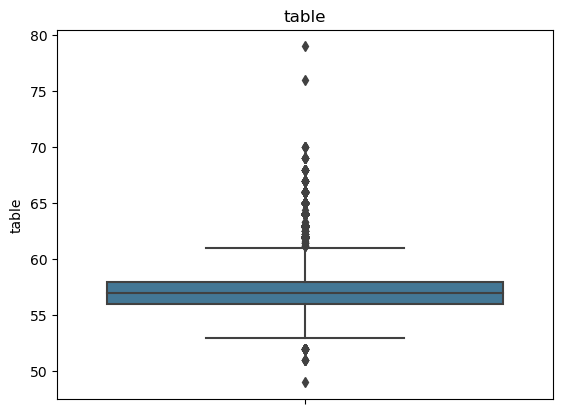

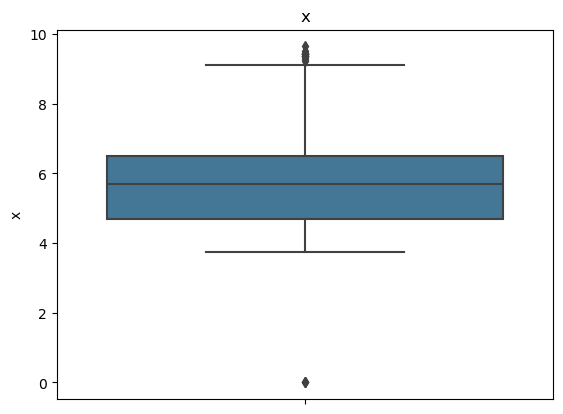

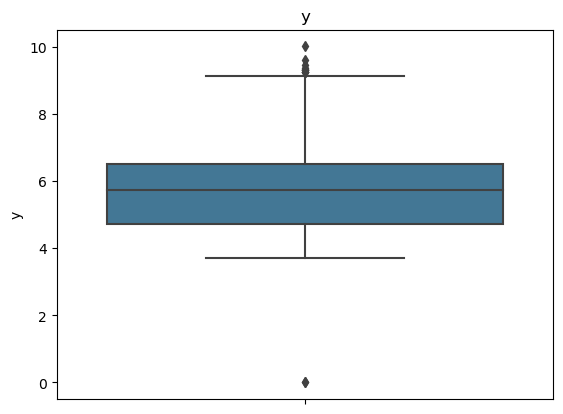

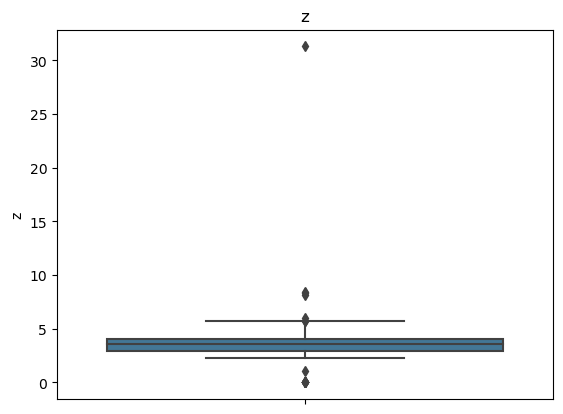

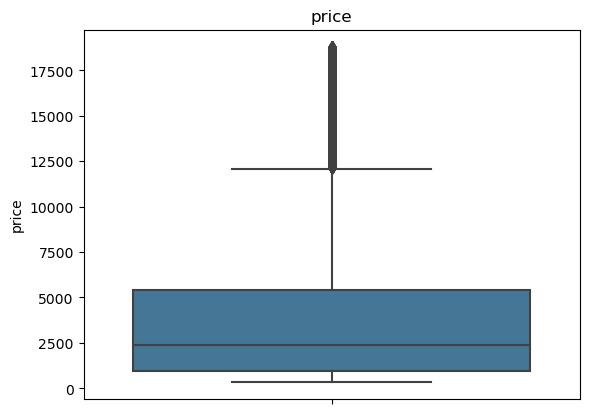

In [25]:
plt.figure(figsize=(5,5))
# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in Numerical_Features:
    sns.boxplot(data=df, y =i, palette = 'mako')
    plt.title(i)
    print('\n')
    plt.show()
    

 # <p style="padding:10px;background-color:#21130d ;margin:10;color:#FFD700;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Bivariate Analysis</p>

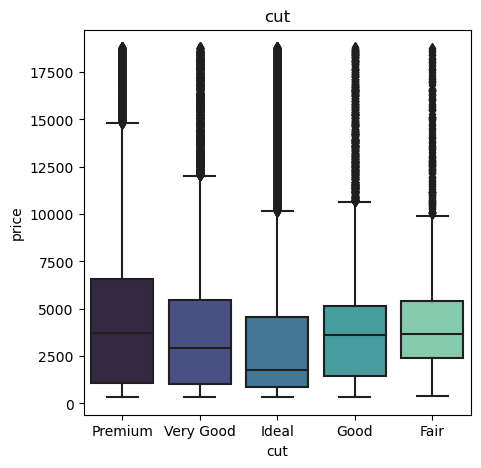

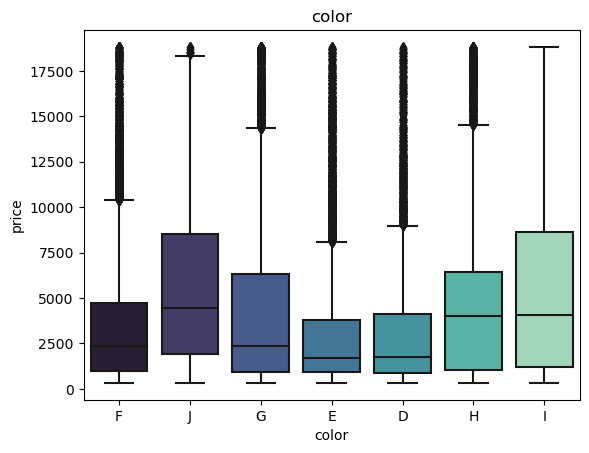

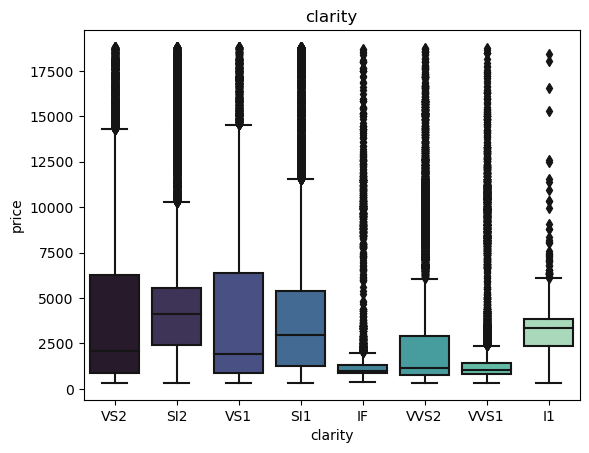

In [22]:
plt.figure(figsize=(5,5))
# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in cat_feature:
    sns.boxplot(data=df, x= i, y ='price', palette = 'mako')
    plt.title(i)
    print('\n')
    plt.show()
    

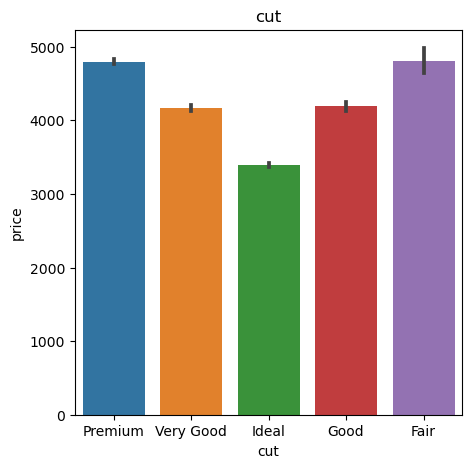

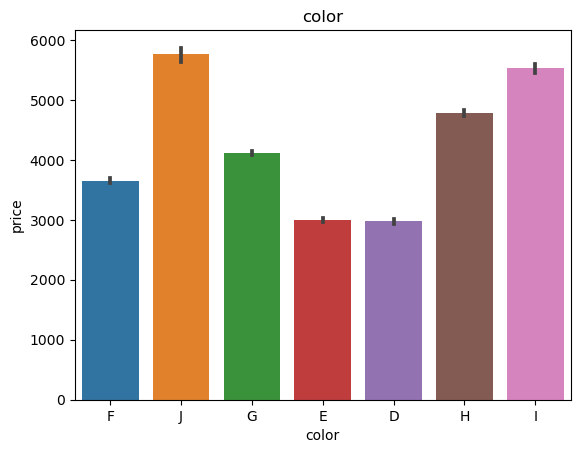

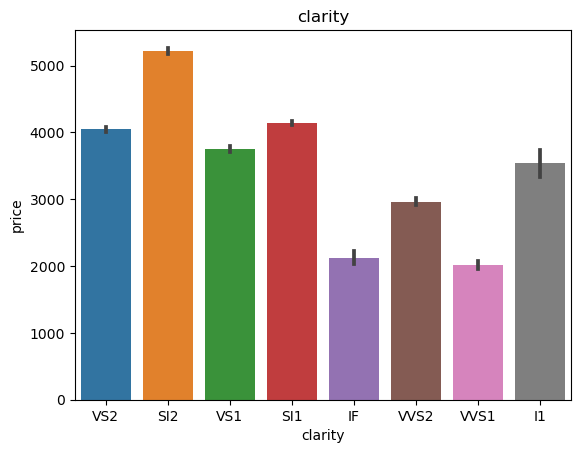

In [32]:
plt.figure(figsize=(5,5))
# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in cat_feature:
    sns.barplot(data=df, x= i, y ='price')
    plt.title(i)
    print('\n')
    plt.show()

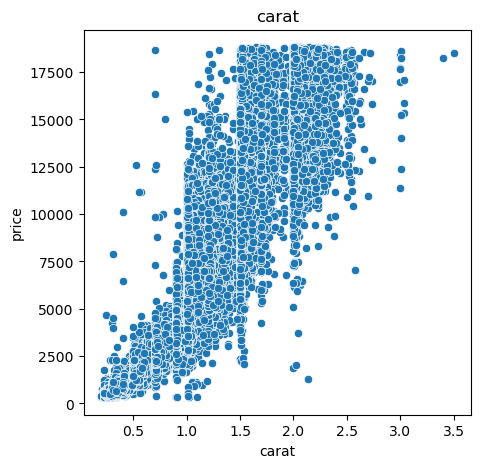

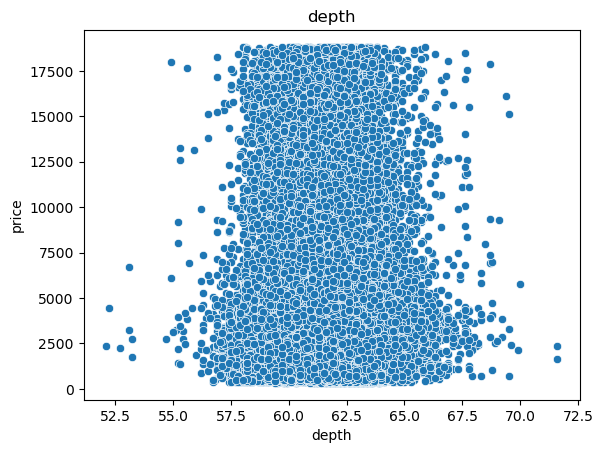

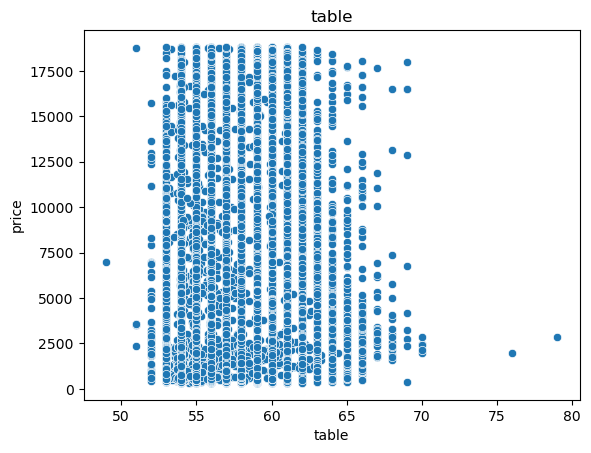

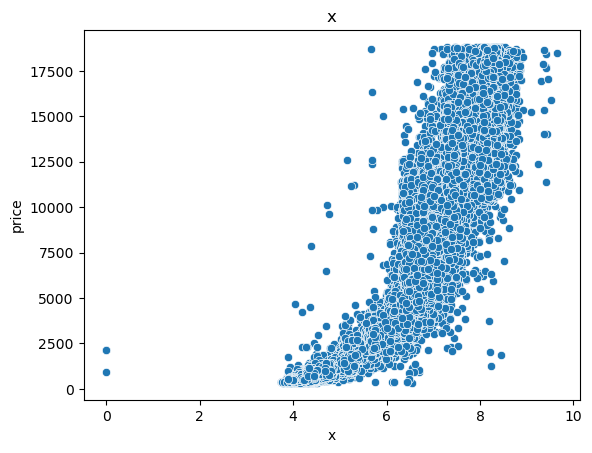

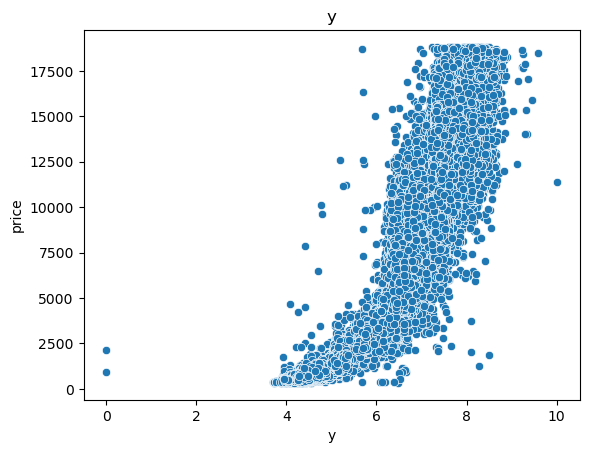

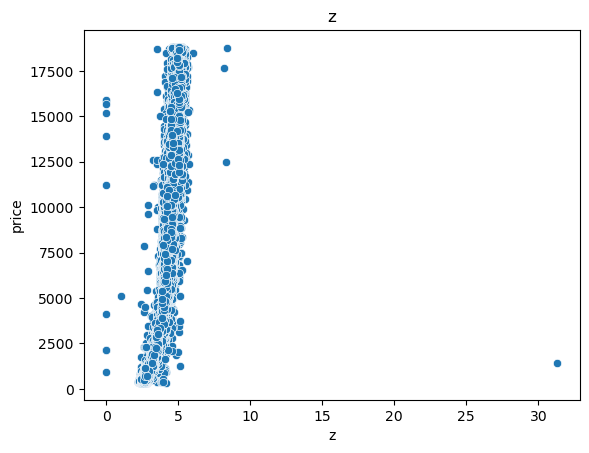

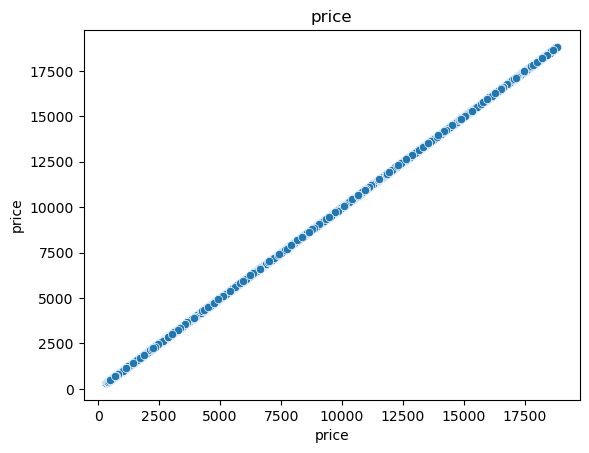

In [23]:
plt.figure(figsize=(5,5))
# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in Numerical_Features:
    sns.scatterplot(data=df, x= i, y ='price', palette = 'mako')
    plt.title(i)
    print('\n')
    plt.show()
    

 # <p style="padding:10px;background-color:#21130d ;margin:10;color:#FFD700;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Multivariate Analysis</p>

In [4]:
df.corr().reset_index()

index        id     carat     depth     table         x         y  \
0     id  1.000000 -0.000771  0.002647  0.002448 -0.000476 -0.000448   
1  carat -0.000771  1.000000  0.027852  0.225737  0.980563  0.980161   
2  depth  0.002647  0.027852  1.000000 -0.230631 -0.010762 -0.011653   
3  table  0.002448  0.225737 -0.230631  1.000000  0.237578  0.233299   
4      x -0.000476  0.980563 -0.010762  0.237578  1.000000  0.999109   
5      y -0.000448  0.980161 -0.011653  0.233299  0.999109  1.000000   
6      z  0.000037  0.974274  0.081821  0.212208  0.989724  0.989527   
7  price -0.001392  0.943396  0.001880  0.174915  0.901004  0.901033   

          z     price  
0  0.000037 -0.001392  
1  0.974274  0.943396  
2  0.081821  0.001880  
3  0.212208  0.174915  
4  0.989724  0.901004  
5  0.989527  0.901033  
6  1.000000  0.893037  
7  0.893037  1.000000

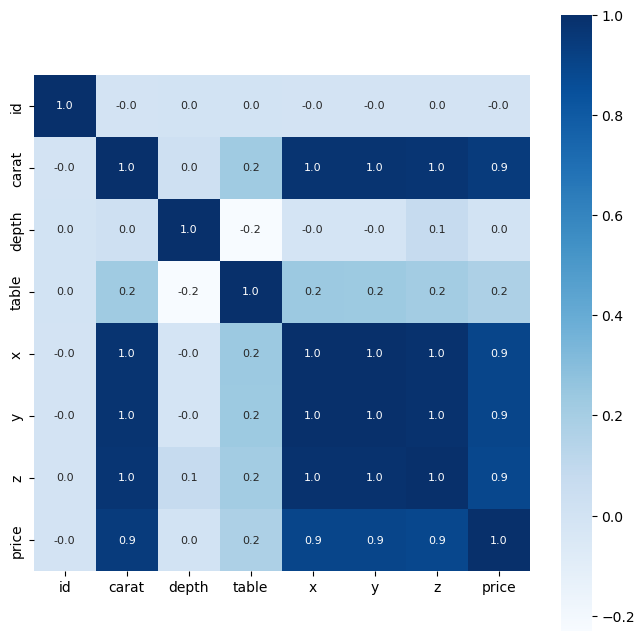

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

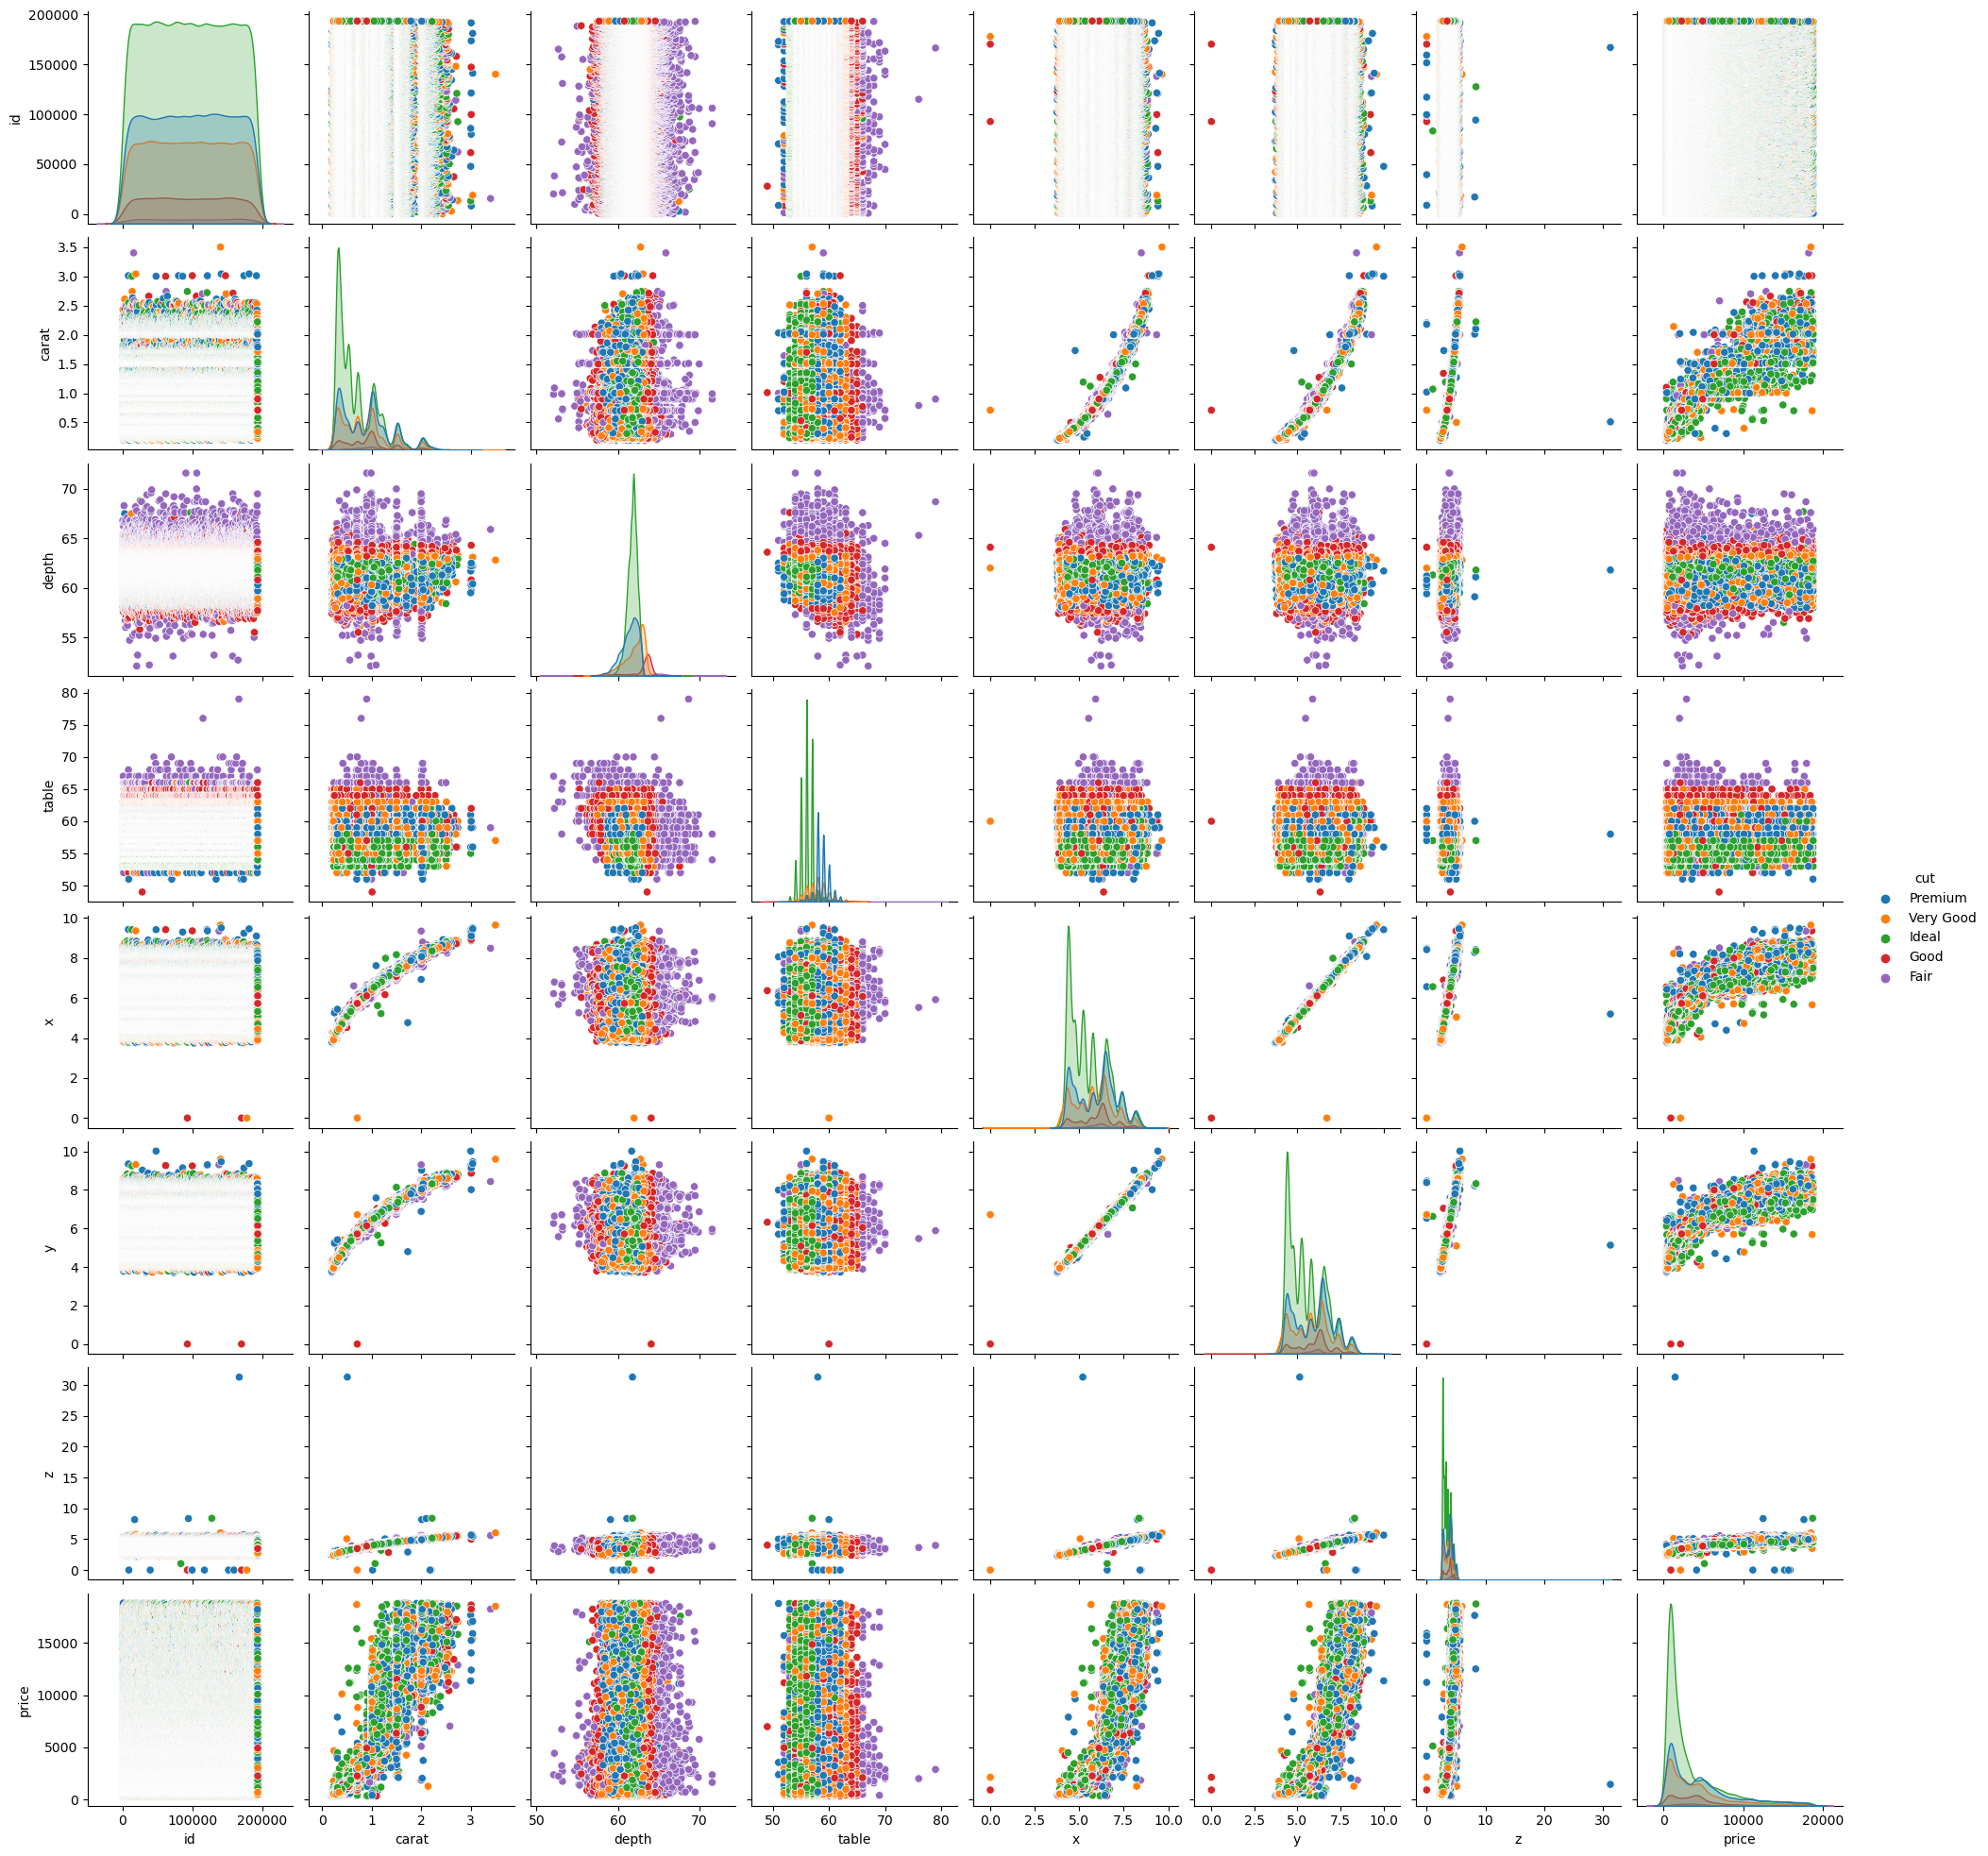

In [28]:
# sns.pairplot(data=df)

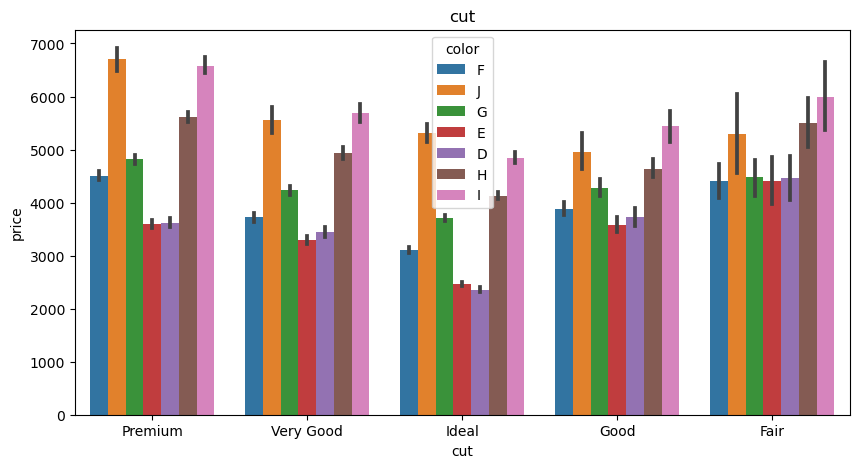

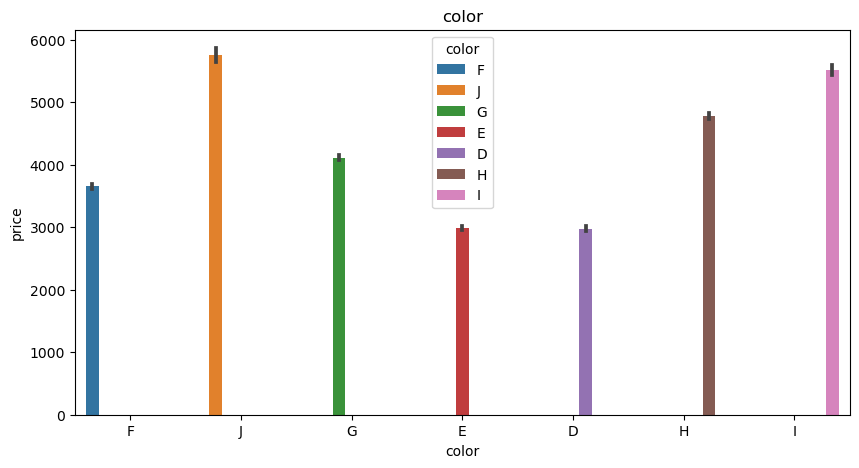

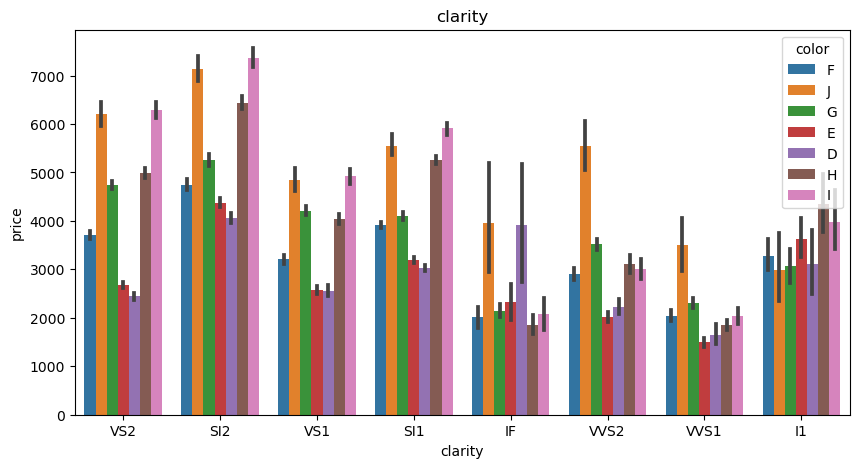

In [39]:
# plt.figure(figsize=(10,5))
# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in cat_feature:
    plt.figure(figsize=(10,5))
    sns.barplot(data=df, x= i, y ='price',hue ="color")
    plt.title(i)
    print('\n')
    plt.show()
    

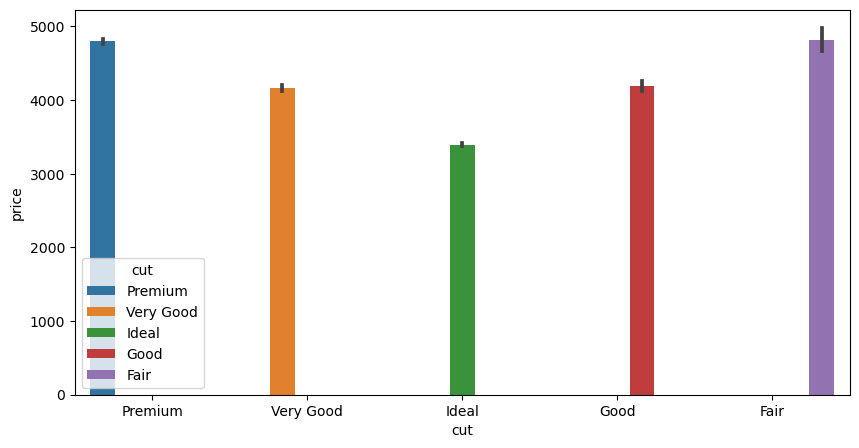

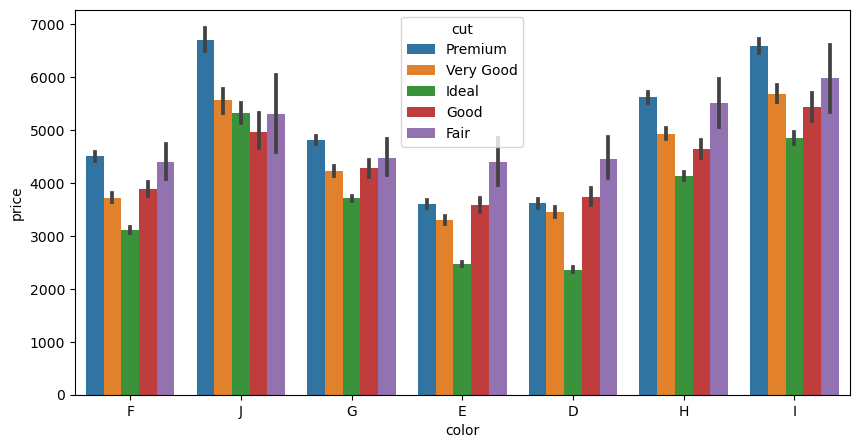

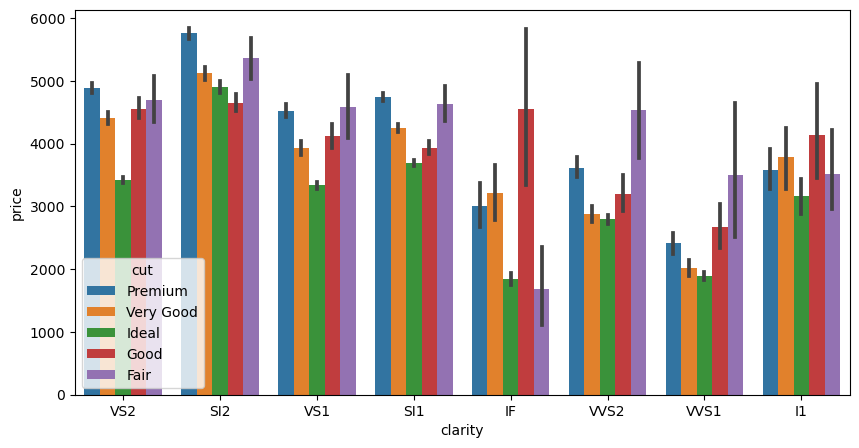

In [40]:
# plt.figure(figsize=(10,5))
# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in cat_feature:
    plt.figure(figsize=(10,5))
    sns.barplot(data=df, x= i, y ='price',hue ="cut")
    # plt.title(i)
    print('\n')
    plt.show()

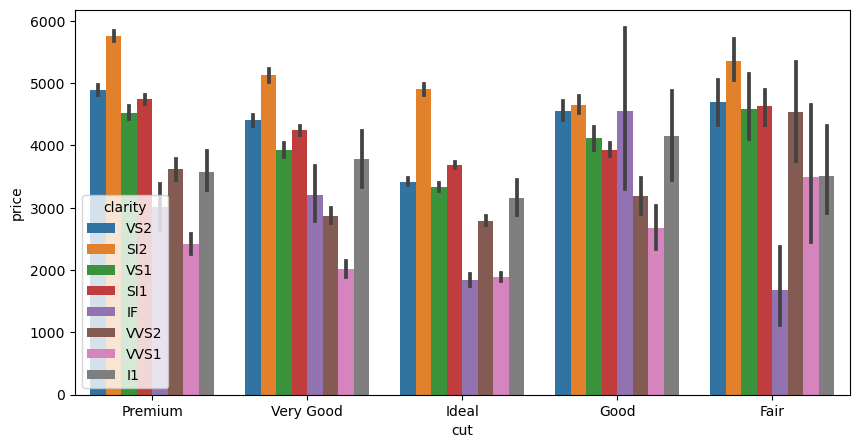

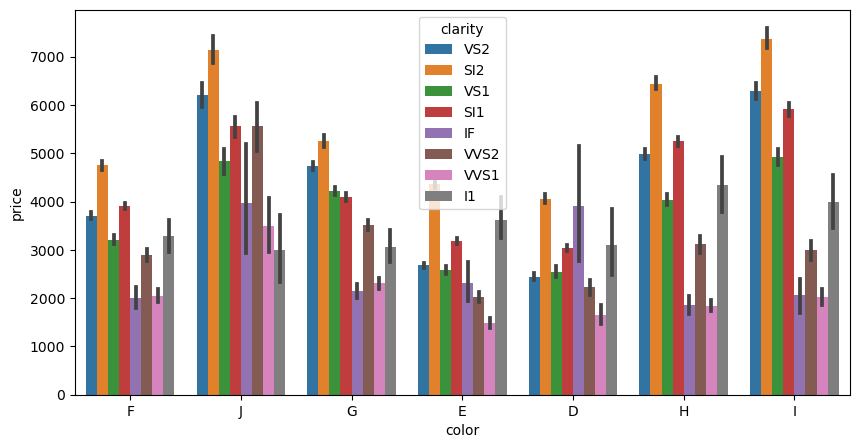

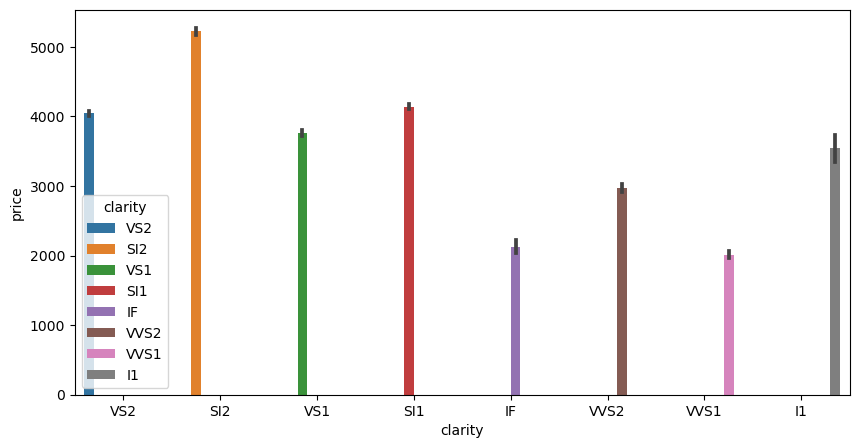

In [41]:
# plt.figure(figsize=(10,5))
# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in cat_feature:
    plt.figure(figsize=(10,5))
    sns.barplot(data=df, x= i, y ='price',hue ="clarity")
    # plt.title(i)
    print('\n')
    plt.show()